In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(1)

In [3]:
epochs = 1
batch_size = 50
lr = 0.001
download_mnist = True

In [4]:
train_data = torchvision.datasets.MNIST(root='./mnist/', 
                                        train=True, 
                                        transform=torchvision.transforms.ToTensor(),
                                        download=download_mnist)

c:\users\dmitriy\appdata\local\programs\python\python37\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])


c:\users\dmitriy\appdata\local\programs\python\python37\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


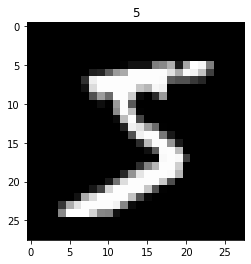

In [5]:
print(train_data.train_data.shape)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title("{}".format(train_data.train_labels[0]))
plt.show()

In [6]:
train_loader = Data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

In [49]:
test_amount = 100
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:test_amount]
test_y = test_data.test_labels[:test_amount]

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=16,
                out_channels=32,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.out = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x

In [9]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [10]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=lr)
loss_func = nn.CrossEntropyLoss()

In [12]:
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SH = False; print('Install sklearn for layer visualizaion, if not there')

def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[: 1]
    for x, y in zip(X, Y, labels):
        c = cm.rainbow(int(255*s/9))
        plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max())
    plt.ylim(Y.min(), Y.max())
    plt.title("Visualize last layer")
    
plt.ion()

In [25]:
for epoch in range(epochs):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x)
        b_y = Variable(y)
        output = cnn(b_x)[0]
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 10 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: {} | train loss: {:.2f}| test acc: {:.2f}'.format(epoch, float(loss.data), accuracy))

plt.ioff()

Epoch: 0 | train loss: 0.25| test acc: 0.91
Epoch: 0 | train loss: 0.28| test acc: 0.91
Epoch: 0 | train loss: 0.39| test acc: 0.92
Epoch: 0 | train loss: 0.25| test acc: 0.92


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [30]:
gen = enumerate(train_loader)

In [36]:
step, (x, y) = next(gen)
print(step)
print(x.shape)
print(y.shape)

2
torch.Size([50, 1, 28, 28])
torch.Size([50])


In [40]:
b_x = Variable(x)
b_y = Variable(y)
output = cnn(b_x)[0]

In [45]:
print(output.shape)
print(output[0])
print(b_y)

torch.Size([50, 10])
tensor([ -3.9780,  -7.4896,  -9.8334,   0.5710,  -6.3417,   6.1118, -10.4964,
         -5.6352,   1.7542,  -0.6691], grad_fn=<SelectBackward>)
tensor([5, 2, 4, 5, 0, 4, 4, 3, 7, 8, 2, 6, 0, 1, 3, 0, 7, 9, 4, 6, 9, 1, 8, 7,
        0, 9, 4, 6, 9, 3, 2, 1, 0, 8, 3, 7, 8, 5, 1, 5, 9, 0, 1, 4, 9, 8, 1, 1,
        7, 7])


In [46]:
loss = loss_func(output, b_y)
print(loss)

tensor(0.1610, grad_fn=<NllLossBackward>)


In [47]:
optimizer.zero_grad()
loss.backward()
optimizer.step()

In [50]:
test_output, last_layer = cnn(test_x)
pred_y = torch.max(test_output, 1)[1].data.squeeze()
accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
print('Epoch: {} | train loss: {:.2f}| test acc: {:.2f}'.format(epoch, float(loss.data), accuracy))

Epoch: 0 | train loss: 0.16| test acc: 0.93


In [68]:
torch.max(test_output, 1)

tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 2, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 3, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 9, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 9, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9])

In [58]:
print(test_x.shape)
print(test_output.shape)
print(last_layer.shape)
print(pred_y.shape)
print(pred_y)
print(accuracy)

torch.Size([100, 1, 28, 28])
torch.Size([100, 10])
torch.Size([100, 1568])
torch.Size([100])
tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 2, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 3, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 9, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 9, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9])
0.93
